In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId：乘客Id
- Survived：0代表NO，1代表YES
- Pclass：1,2,3代表成员的经济社会地位1最高，3最低
- Name：乘客姓名
- Sex：代表性别
- Age：年龄
- SibSp：由两部分组成，Sibling（兄弟姐妹，堂妹都合适），Spouse代表（丈夫或妻子）
- Parch：父母和孩子组成，若只跟保姆写0
- Ticket：票的数字
- Fare：乘客票价
- Cabin：船舱数字
- Embarked：登船仓：C=Cherbourg，Q=Queenstown，S=Southampton

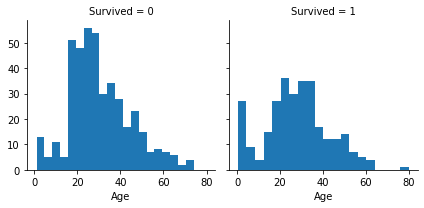

In [3]:
# 做一下探索性数据分析(试一试 sns 玩玩)
age_sns = sns.FacetGrid(data, col='Survived')
age_sns.map(plt.hist, "Age", bins=20)

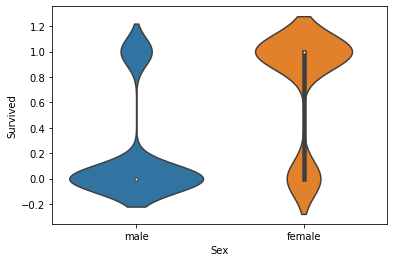

In [4]:
sns.violinplot(x="Sex", y='Survived', data=data)

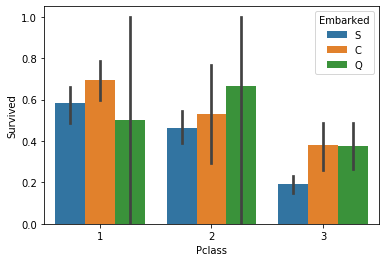

In [5]:
sns.barplot(x="Pclass", y="Survived", data=data, hue="Embarked")

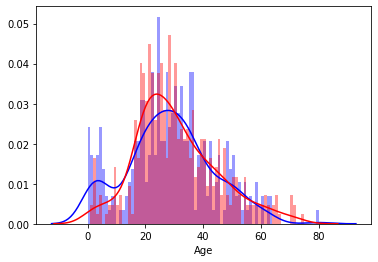

In [6]:
sns.distplot(data[data['Survived'] == 1]["Age"].dropna(), norm_hist=True, color='blue', bins=np.arange(0,81,1))
sns.distplot(data[data['Survived'] == 0]["Age"].dropna(), norm_hist=True, color='red', bins=np.arange(0,81,1))

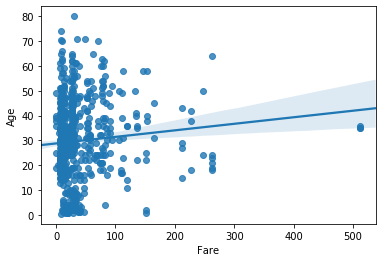

In [7]:
sns.regplot(x="Fare", y="Age", data=data)

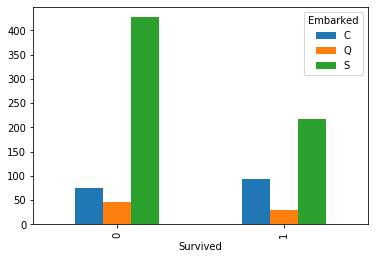

In [8]:
# 登录仓和存活率的关系
group_embarked = data.groupby(['Survived', "Embarked"])["PassengerId"].count()
group_embarked.unstack().plot(kind='bar')

由分布可以大概看出来,登录仓的存活分布相对来说一致, 体现在每个仓的存活率

In [9]:
# 计算每个船舱的存活率
group_embarked = group_embarked.reset_index()
survived = group_embarked.drop(group_embarked[group_embarked['Survived'] == 1].index)
un_survived = group_embarked.drop(group_embarked[group_embarked['Survived'] == 0].index)

In [10]:
merge_survived = pd.merge(survived, un_survived, on='Embarked', suffixes=("_survived", "_unsurvived"))
merge_survived["survived_rate"] = merge_survived["PassengerId_survived"] / (
    merge_survived['PassengerId_survived'] + merge_survived["PassengerId_unsurvived"]
)
survived_rate = merge_survived[["Embarked", "survived_rate"]]
survived_rate

,Embarked,survived_rate
0,C,0.446429
1,Q,0.610390
2,S,0.663043


In [11]:
# 数据集的缺失情况
def show_data_nan_info(data):
    print(f"数据的总体情况:{data.shape}")
    for column in data.columns:
        print(f"{column}: {data[column].isna().tolist().count(True)}")

In [12]:
show_data_nan_info(data)

数据的总体情况:(891, 12)
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


In [13]:
# 上面的数据看出
# 处理缺失值: 由于Cabin缺失值太过严重剔除, Age 用平均值处理, Embarked 只有2个 删除这两行
data = data[data['Embarked'].isna() == False]
data['Age'] = data['Age'].fillna(value=int(data['Age'].mean()))
# 剔除Cabin 因为缺失值太多
data.drop(['Cabin'], axis=1, inplace=True)
show_data_nan_info(data)

数据的总体情况:(889, 11)
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Embarked: 0


In [14]:
data.info()
# 需要将 Name, Sex, Embarded, Ticket 处理成数值类型
# Name 和 Ticket 对是否存活应该影响不大删掉这个特征
# Sex 使用标签编码, Embarked 使用 one-hot编码

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [15]:
sex_mapping = {
    "male": 1,
    "female": 0
}
data['Sex'] = data['Sex'].map(sex_mapping)

In [16]:
one_hot_embarked = pd.get_dummies(data['Embarked'], prefix='Embarked')
data = pd.concat([data, one_hot_embarked], axis=1) 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1


In [17]:
# 删除对结果没有影响的列, 乘客id, 名称, 还有就是 船票的数字, Embarked 已经进行了 one_hot 处理这个是多余的
data.drop(["PassengerId", "Name", "Ticket", "Embarked"], axis=1, inplace=True)

In [18]:
# 现在已经全部转化完成.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
Sex           889 non-null int64
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Fare          889 non-null float64
Embarked_C    889 non-null uint8
Embarked_Q    889 non-null uint8
Embarked_S    889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [19]:
data.corr()['Survived'].sort_values(ascending=False)

Survived      1.000000
Fare          0.255290
Embarked_C    0.169966
Parch         0.083151
Embarked_Q    0.004536
SibSp        -0.034040
Age          -0.072699
Embarked_S   -0.151777
Pclass       -0.335549
Sex          -0.541585
Name: Survived, dtype: float64

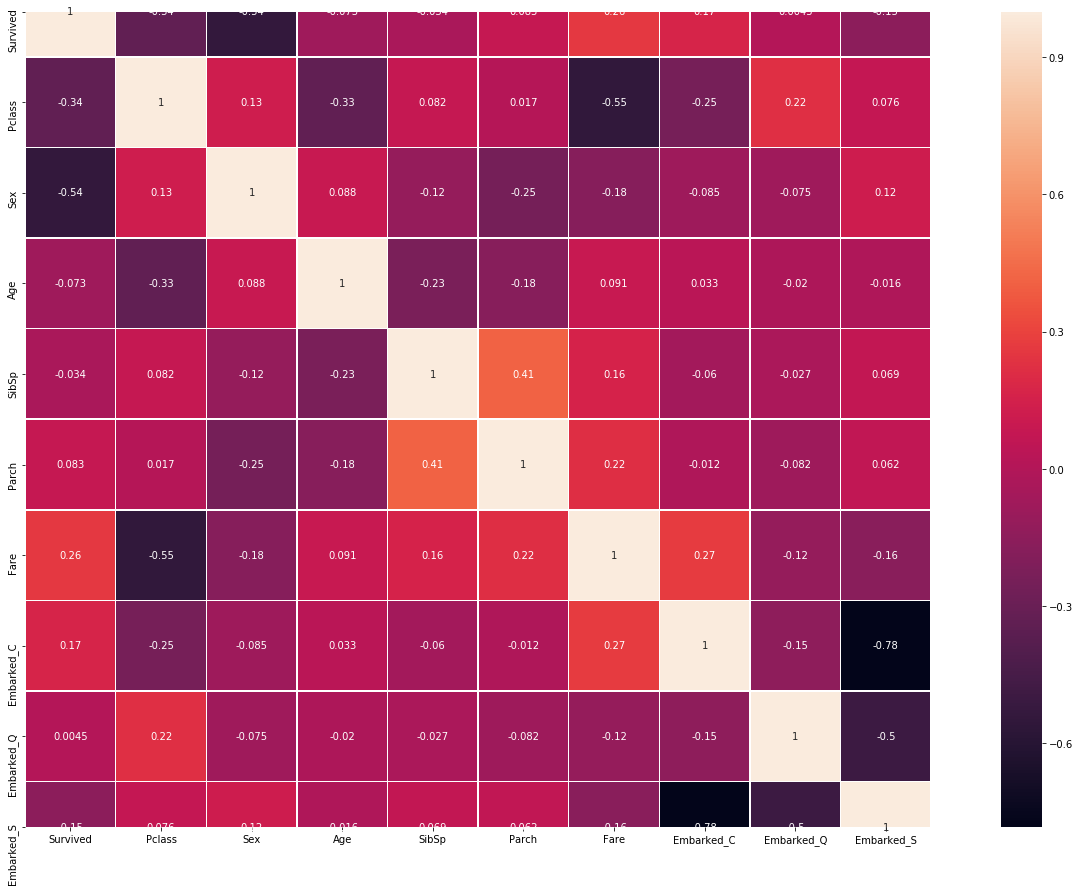

In [20]:
f, ax = plt.subplots(figsize=[25, 15])
sns.heatmap(data.corr(), linewidths=.5, annot=True, square=True)

In [21]:
# 模型训练
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
lr = LogisticRegression()
y = data.loc[:, "Survived"]
X = data.drop(['Survived'], axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=0)
lr.fit(X_train, y_train)
print("权重:", lr.coef_)
print("截距:", lr.intercept_)
y_hat = lr.predict(X_test)

权重: [[-0.86732893 -2.53532747 -0.03774045 -0.30596744 -0.06020064  0.00430423
   1.19134425  1.37324383  0.70396915]]
截距: [3.26855723]


In [23]:
# 正确率
lr.score(X_test, y_test)

0.7533632286995515

In [24]:
X.shape

(889, 9)

In [25]:
np.array(y).reshape(-1, 1).shape

(889, 1)

In [26]:
# 使用交叉验证
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(lr, X, y, cv=10)
predictions = pd.Series(predictions)
predictions[: 100]

0     0
1     1
2     1
3     1
4     0
     ..
95    0
96    1
97    1
98    0
99    1
Length: 100, dtype: int64

In [27]:
# 混淆矩阵


# 假正类(False Positive, FP) 将负类预测为正类
fp_filter = (predictions == 1) & (data["Survived"] == 0)
fp = len(predictions[fp_filter])
# 真正类 (True Positive, TP) 将正类预测为正类
tp_filter = (predictions == 1) & (data["Survived"] == 0)
tp = len(predictions[tp_filter])
# 假负类(False Negative, FN) 将正类预测为负类
fn_filter = (predictions == 0) & (data['Survived'] == 1)
fn = len(predictions[fn_filter])
# 真负类(True Negative, TN) 将负类预测为父类
tn_filter = (predictions == 0) & (data["Survived"] == 0)
tn = len(predictions[tn_filter])

$$
    TPR = \frac{truepositives}{falsenegative + truepositives} \\
    FPR = \frac{falsepositives}{falsepositives + truenegative}
$$

In [28]:
tpr = tp / (tp + fn)
fpr = fp / (tn + fp)
print(f"真正率: {tpr}")
print(f"假正率: {fpr}")

真正率: 0.46365914786967416
假正率: 0.3375912408759124


In [29]:
lr = LogisticRegression(class_weight='balanced')
predictions = cross_val_predict(lr, X, y, cv=10)
predictions = pd.Series(predictions)

# 假正类(False Positive, FP) 将负类预测为正类
fp_filter = (predictions == 1) & (data["Survived"] == 0)
fp = len(predictions[fp_filter])
# 真正类 (True Positive, TP) 将正类预测为正类
tp_filter = (predictions == 1) & (data["Survived"] == 0)
tp = len(predictions[tp_filter])
# 假负类(False Negative, FN) 将正类预测为负类
fn_filter = (predictions == 0) & (data['Survived'] == 1)
fn = len(predictions[fn_filter])
# 真负类(True Negative, TN) 将负类预测为父类
tn_filter = (predictions == 0) & (data["Survived"] == 0)
tn = len(predictions[tn_filter])

tpr = tp / (tp + fn)
fpr = fp / (tn + fp)
print(f"真正率: {tpr}")
print(f"假正率: {fpr}")

真正率: 0.5222772277227723
假正率: 0.38503649635036497


In [30]:
# svm 算法
from sklearn.svm import SVC, SVR
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
# 正确率
clf.score(X_test, y_test)

0.7623318385650224

In [31]:
predictions = cross_val_predict(clf, X, y, cv=10)
predictions = pd.Series(predictions)

# 假正类(False Positive, FP) 将负类预测为正类
fp_filter = (predictions == 1) & (data["Survived"] == 0)
fp = len(predictions[fp_filter])
# 真正类 (True Positive, TP) 将正类预测为正类
tp_filter = (predictions == 1) & (data["Survived"] == 0)
tp = len(predictions[tp_filter])
# 假负类(False Negative, FN) 将正类预测为负类
fn_filter = (predictions == 0) & (data['Survived'] == 1)
fn = len(predictions[fn_filter])
# 真负类(True Negative, TN) 将负类预测为父类
tn_filter = (predictions == 0) & (data["Survived"] == 0)
tn = len(predictions[tn_filter])

tpr = tp / (tp + fn)
fpr = fp / (tn + fp)
print(f"真正率: {tpr}")
print(f"假正率: {fpr}")

真正率: 0.4665012406947891
假正率: 0.34306569343065696
